# Classification, Regression, Cross-validation, and Evaluation Metrics
# Introduction
In this worksheet you will write functions to implement evaluation metrics for classification and regression problems. You will:
 - Use library functions from scikit-learn (https://scikit-learn.org/stable/)
 - Use NumPy and matplotlib
 - Write and call functions in Python
 - Gain understanding of the evaluation metrics used.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Classification
In this question you will use a toy dataset from scikit-learn. You will use functions from scikit-learn to load the data, divide it into training and testing sets, and then fit a simple classifier to the training set. You will then write functions to calculate accuracy, precision, and recall. Finally, you will check your functions against the functions from scikit-learn.

## Part a) Load the data

In [2]:
# scikit-learn comes with a number of toy datasets (https://sklearn.org/datasets/index.html#toy-datasets)
from sklearn import datasets

# Load the wine dataset from sklearn. You may want to take a look at the format of the dataset
wine = datasets.load_wine()

# Save the datapoints into the variable X and the targets into the variable y
X = wine.data
y = wine.target

Take a look at the target values in y. What do you notice about these? Why are these suitable for a classification algorithm rather than a regression algorithm?

In [5]:
#  Look at the values in y

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

## Part b) Divide the data into training and testing sets
Use the function `train_test_split` from `sklearn.model_selection` to split out the data and targets into training and testing sets.

In [6]:
# We import the function train_test_split from sklearn and use this to split the data
from sklearn.model_selection import train_test_split

# The function returns splits of each array passed in. 
# The proportion to be used as the training set is given by test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Part c) Import the k-nearest neighbours classifier and run it on the data
Scikit-learn has a huge range of *estimators* that you can use with your dataset. An estimator is any procedure that can be used to fit data and make predictions from it. Here we will import the k-nearest neighbours classifier, instantiate it, run it on our training set, and then use it to generate some predictions. You will learn more about k-nearest neighbours in Week 14. For now, we are simply using it to generate some predictions.

The general procedure for using the estimators in scikit-learn is as follows. Every estimator has a method `fit(X, y)` and a method `predict(T)`. 

1) Import the estimator
    e.g. `from sklearn.models import Classifier`
    
2) Instantiate the estimator to a variable
    e.g. `est = Classifier(hparams)`
    
3) Fit the estimator to the data
    e.g. `est.fit(X, y)`
    
4) Make a prediction
    e.g. `predictions = est.predict(test_data)`
    
You can see an example of this in the code below:

In [8]:
# We first import the classifier
from sklearn.neighbors import KNeighborsClassifier

# We instantiate the classifier with 5 neighbours
knn = KNeighborsClassifier(n_neighbors=5)

# We fit the model using our training data
knn.fit(X_train, y_train)

# Finally, we generate predictions on the test data
ypred_test=knn.predict(X_test)

## Part d) Evaluating the classifier
In this section we will implement functions for accuracy, precision and recall, and compare them with the functions given in sklearn (they should give the same results!)

The wine dataset has 3 classes. We will write functions to compute the accuracy of the classifer, the macro-averaged precision and the macro-averaged recall.

Recall the equations for accuracy, precision, and recall:

$$Accuracy = \frac{\text{Number correct}}{\text{Total datapoints}}$$
i.e. the number of correctly classified datapoints as a proportion of all $n$ datapoints

$$Precision_c = \frac{TP_c}{TP_c+FP_c}$$
i.e. the precision for class $c$ is the number of true positives for class $c$ as a proportion of the total number of positive predictions for class $c$

$$Recall_c = \frac{TP_c}{TP_c+FN_c}$$
i.e. the recall for class $c$ is the number of true positives for class $c$ as a proportion of the total number of actual positives for class $c$

The macro-averaged precision and macro-averaged recall are then simply calculated by averaging the precision (or recall) for each class:

$$Precision = \frac{1}{k} \sum_{c = 1}^k Precision_c, \quad Recall = \frac{1}{k} \sum_{c = 1}^k Recall_c$$

We can automatically generate the confusion matrix for our data using the function `confusion_matrix` from `sklearn.metrics`

In [9]:
# Import the function confusion_matrix
from sklearn.metrics import confusion_matrix

#Build the confusion matrix from the target test set y_test and our predicted values ypred_test
cm = confusion_matrix(y_test, ypred_test)

Take a look at the confusion matrix. What should its dimensions be? 

In [12]:
cm

array([[8, 0, 0],
       [1, 9, 6],
       [0, 6, 6]], dtype=int64)

In [11]:
# Look at the confusion matrix cm

# classificaton_report is a function that generates a report of various metrics
# for our classifier. We can use this to check our results
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.60      0.56      0.58        16
           2       0.50      0.50      0.50        12

    accuracy                           0.64        36
   macro avg       0.66      0.69      0.67        36
weighted avg       0.63      0.64      0.63        36


(**Optional**) Write a function `my_accuracy` that takes in two arrays `y` for target values and `pred` for predicted  values, and returns accuracy.

In [13]:
# 写一个函数my_accuracy，它接受两个数组y和pred，用于目标值和预测值，并返回准确性。
def my_accuracy(y, pred):
    acc=np.sum(y==pred)/len(y)
    return acc

my_accuracy(y_test, ypred_test)

0.6388888888888888

(**Optional**) Write a function `my_recall_macro` that takes in two arrays `y` for target values and `pred` for predicted  values, and returns recall. 

In [15]:
def my_recall_macro(y, pred):
    recalls = []
    cm = confusion_matrix(y, pred)
    # Write your answer here
    for i in range(len(cm)):
        TP = cm[i][i]
        FN = np.sum(cm[i]) - TP
        recalls.append(TP/(TP+FN))
    return np.mean(recalls)      

my_recall_macro(y_test, ypred_test)

0.6875

(**Optional**) Write a function `my_precision_macro` that takes in two arrays `y` for target values and `pred` for predicted  values, and returns precision. 

In [16]:
def my_precision_macro(y, pred):
    # Write your answer here
    precisions = []
    cm = confusion_matrix(y, pred)
    for i in range(len(cm)):
        TP = cm[i][i]
        FP = np.sum(cm[:,i]) - TP
        precisions.append(TP/(TP+FP))
    return np.mean(precisions)

my_precision_macro(y_test, ypred_test)

0.662962962962963

(**Optional**) Check that your functions match those in sklearn.

In [17]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
my_accuracy(y_test, ypred_test) == accuracy_score(y_test, ypred_test)

True

In [18]:
my_recall_macro(y_test, ypred_test)==recall_score(y_test, ypred_test, average='macro')

True

In [19]:
my_precision_macro(y_test, ypred_test)==precision_score(y_test, ypred_test, average='macro')

True

# 2. Regression

In this question we will use sklearn to fit a linear model to some artificial data. You will then implement a function to calculate the mean squared error and a function to calculate $r^2$.

The model we fit is just a line, i.e. $y = ax + b$. 

## Part a) Create an artificial dataset
We start off by creating some artificial data that is a line with some noise added.

In [32]:
# We set up a random number generator (rng), seeded with a number (in this case 10). 
# Using a seed means we can generate the same sequence of pseudorandom numbers, and so we can check results easily.
rng = np.random.default_rng(10) 

# a and b are coefficients for the line
a = 2
b = -1

# Use np.linspace to generate datapoints from 0 to 10 (inclusive) spaced at 0.1
X = np.linspace(0, 10, 101)  #即0到10之间取101个数，步长为0.1

# Create data Y using the equation for a line
Y = a*X + b # Y=2x-1

# Adds Gaussian noise with mean 0 and standard deviation 3 to the data
Y = Y + 3*rng.standard_normal(len(Y)) # Y=2x-1+3*noise

## Part b) Plot the data on named axes

Text(0, 0.5, 'y')

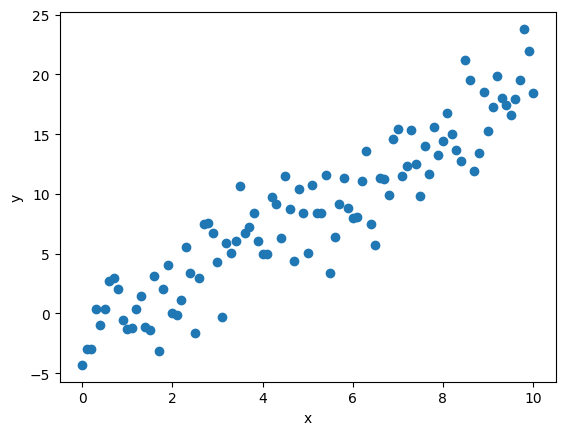

In [33]:
fig, ax = plt.subplots() # This generates us a named figure and axes
ax.scatter(X, Y, label = 'Data') # We generate a scatterplot of the data on the axes.
plt.xlabel('x')
plt.ylabel('y')

## Part c) Split the data into training and testing sets
Split the data X and targets Y into training and testing sets using the function `train_test_split`. Set the proportion of the dataset to use as test data to 0.1.

In [36]:
# Write your answer here
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1)
Xtrain.shape

(90,)

## Part d) Instantiate and fit the estimator
Import the estimator `LinearRegression` from `sklearn.linear_model` and instantiate it. No parameters are needed.

In [23]:
# Write your answer here
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

You will need to reshape the data (but not the targets) before passing it to this model. 

In [38]:
# This reshapes the data to have 1 column and however many rows make sense for the data
Xtrain = Xtrain.reshape(-1, 1) # 表示行数不确定，列数为1
Xtrain.shape

(90, 1)

Call the method `fit` with your training data to train the model

In [39]:
# Write your answer here
lr.fit(Xtrain, Ytrain)

LinearRegression()

The coefficient(s) and intercept for the trained model ($a$ and $b$ in our case) are called `coef_` and `intercept_`. Are these what you would expect? Are they similar to the values of `a` and `b` that we used to generate the data?

In [40]:
# Look at coef_ and intercept_
lr.coef_, lr.intercept_

(array([2.04482641]), -1.8963430550574536)

Using the values stored in `coef_` and `intercept_`, plot a line representing the fitted model on the same axes (`ax`) as before. Type `fig` to view the plot.

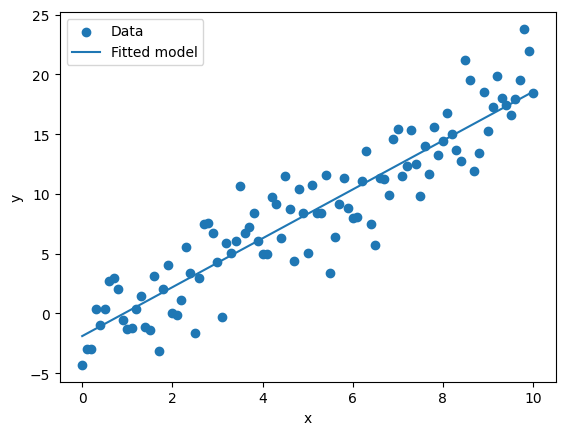

In [41]:
# 使用coef_和intercept_中存储的值，在与之前相同的轴（ax）上绘制表示拟合模型的线。键入fig以查看绘图。
ax.plot(X, lr.coef_*X + lr.intercept_, label = 'Fitted model') #表示用X和预测的Y值画出拟合的直线

# Add a legend to the plot
ax.legend()

# Type fig to view the plot
fig

Reshape the test data to have one column and then call `predict` on the regression model to get the predicted y values

In [45]:
Xtest = Xtest.reshape(-1, 1)
# Call predict on the regression model and assign the output to a variable ypred
ypred = lr.predict(Xtest)

# Print out the first 5 values of ypred
print('Predicted values: ', ypred[:5])

# Print out the first 5 values of Ytest
print('Actual values: ', Ytest[:5])


Predicted values:  [ 2.60227506 18.34743844  7.30537581 12.62192448  4.23813619]
Actual values:  [ 1.1181219  21.99500934 11.45808596 11.5074973   4.28582358]


## (Optional) Part e) Calculating mean squared error MSE
The equation for the mean squared error is 
$$ MSE = \frac{\sum_{i = 1}^n (y_i - f(x_i))^2}{n} $$
Write a function that takes in arrays for the target values `y` and the predicted values `pred` and returns the mean squared error.
MSE表示均方误差，即预测值与真实值之间的差的平方的均值

In [46]:
# calculate the mean squared error
def MSE(y, pred):
    mse=np.sum((y-pred)**2)/len(y)
    return mse

MSE(Ytest, ypred)

11.956136765481032

Check your function against the function `mean_squared_error` from `sklearn.metrics`

In [47]:
# Compare with sklearn.metrics.mean_squared_error
from sklearn.metrics import mean_squared_error
mean_squared_error(Ytest, ypred)

11.956136765481032

## (Optional) Part f) Calculating R^2
Recall from the lecture that $R^2$ is defined as

$$R^2(y, \hat{y})) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

This represents the proportion of the variance of y that is explained by the independent variables in the model. It is essentially a comparison of the fitted model with the mean of the target values ($\bar{y}$). Implement your own function to calculate $R^2$ and then compare it with `r2_score` from `sklearn.metrics`

R^2表示决定系数，即模型对数据方差的解释能力，越接近1，表示模型越好

In [48]:
# Calculate R^2
def R2(y, pred):
    r2=1-np.sum((y-pred)**2)/np.sum((y-np.mean(y))**2)
    return r2

R2(Ytest, ypred)

0.7900167752776286

In [49]:
# Compare with sklearn.metrics.r2_score
from sklearn.metrics import r2_score
r2_score(Ytest, ypred)

0.7900167752776286

# 3. Using cross-validation for model selection
交叉验证是一种评估泛化性能的统计方法，它将数据集划分为k个大小相似的互斥子集，然后做k次模型训练和验证，每次用k-1个子集的并集作为训练集，余下的那个子集作为验证集，这样就得到了k组训练/验证集，从而可以进行k次训练和验证，最终返回的是这k个验证结果的均值。交叉验证的目的是为了验证模型的稳定性，即不同的训练集训练出来的模型，其性能如何。交叉验证的结果可以用来选择模型，比如在分类问题中，我们可以选择准确率最高的模型。

In this section we will fit a series of classifiers with different parameter settings, and use k-fold cross validation to select the most appropriate parameter values. We will use a *decision tree* classifier. We will cover this classifier in more detail in future lectures. For now, all you need to know is that a decision tree has a parameter `max_depth` that says how many layers the tree may have. More layers means that the tree can divide up the feature space into finer classes, but this could come at the expense of overfitting.

## Part a) 
We first of all create an artificial dataset with 2000 samples, 10 features, and 4 classes.

In [50]:
from sklearn.datasets import make_classification # make_classification是用于生成分类数据的函数
X, y = make_classification(n_samples = 2000, n_features = 10, n_classes=4, n_informative = 3, random_state=10)

Use the function `train_test_split` to separate out 0.2 of your dataset. This will be kept aside as our held-out test set.

In [51]:
# Write your answer here
from sklearn.model_selection import train_test_split
Xtr, Xtest, ytr, ytest = train_test_split(X, y, test_size=0.2)

### Part b) Setting up k-fold cross validation
We import the function `KFold` from `sklearn.model_selection`, and instantiate it with 10 folds.

In [52]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=63, shuffle=True) # n_splits表示将数据集分成几份，random_state表示随机种子，shuffle表示是否打乱数据集

### Part c) Running cross-validation for different parameter settings
We import the decision tree classifier and run it over depths from 1 to `max_d`. For each depth we run cross-validation over the training set.

In [53]:
from sklearn.tree import DecisionTreeClassifier
max_d = 20
#Set up variables to store training and validation accuracies. 
train_accuracies = [[] for _ in range(max_d)]
val_accuracies = [[] for _ in range(max_d)]

# Loop over depths
for d in range(max_d):
    #Instantiate the DecisionTreeClassifier here. Set the parameter max_depth to d+1
    #We add 1 because d ranges from 0 to max_d-1, but we want depths from 1 to max_d
    clf = DecisionTreeClassifier(max_depth=d+1)
    
    #Loop over cross-validation splits. Note that we perform cross validation on our training data Xtr.
    #We keep our testing data Xtest aside 我们将测试数据Xtest放在一边
    for train_index, val_index in kf.split(Xtr): 
        # kf.split(Xtr)返回的是一个迭代器，每次迭代返回一个元组，元组中包含两个数组，分别是训练集和验证集的索引
        Xtrain, Xval = Xtr[train_index], Xtr[val_index]
        ytrain, yval = ytr[train_index], ytr[val_index]
        
        #Fit the classifier on Xtrain and Ytrain
        clf.fit(Xtrain, ytrain)
        
        #Make predictions on Xtrain and assign to a variable pred_train
        pred_train = clf.predict(Xtrain)
        
        #Make predictions on Xval and assign to a variable pred_val
        pred_val = clf.predict(Xval)
        
        #Calculate the accuracy of the predictions on the training set and save in the variable train_accuracies
        train_accuracies[d].append(accuracy_score(ytrain, pred_train))
        
        #Do the same for the predictions on the validation set
        val_accuracies[d].append(accuracy_score(yval, pred_val))

#Calculate the mean and standard deviation for each depth across splits 
train_accuracy_mean = np.mean(train_accuracies, axis=1) # axis=1表示按行求均值
train_accuracy_stdev = np.std(train_accuracies, axis=1)
val_accuracy_mean = np.mean(val_accuracies, axis=1)
val_accuracy_stdev = np.std(val_accuracies, axis=1)

# The arrays of means and standard deviation should have shape (max_d, ). The following will generate an error if not.
# assert断言，如果条件为真，则继续执行，否则抛出AssertionError异常
# 判断train_accuracy_mean的形状是否为(max_d, )
assert(np.shape(train_accuracy_mean)==(max_d,)) 
assert(np.shape(train_accuracy_stdev)==(max_d,))
assert(np.shape(val_accuracy_mean)==(max_d,))
assert(np.shape(val_accuracy_stdev)==(max_d,))

### Plotting results

Plot the mean accuracy attained on the training set and on the validation set at each depth. Your figure should look something like the following:

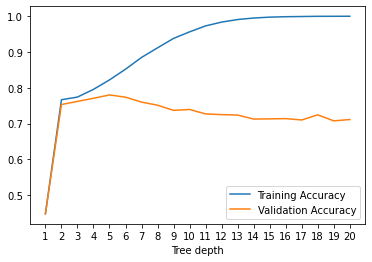

What do you notice about these results? Which value of max_depth would you use for your held-out test set?

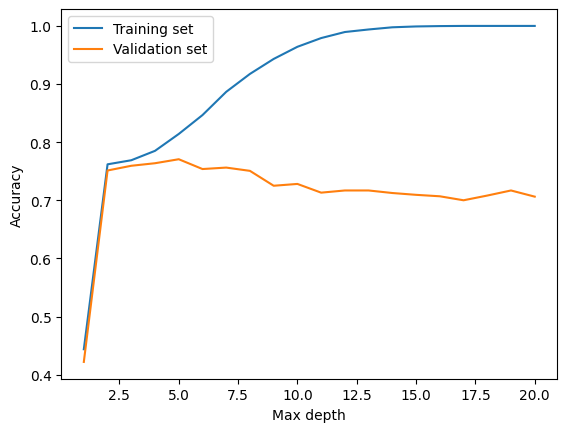

In [55]:
# Write code to plot your results here
plt.plot(range(1, max_d+1), train_accuracy_mean, label='Training set')
plt.plot(range(1, max_d+1), val_accuracy_mean, label='Validation set')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend()

### Computing accuracy on the test set
Based on your plotted results, decide on the best value of `max_depth` to use in your decision tree classifier. Instantiate a new classifier with your chosen value. Fit the model on the training data. Make a prediction on the held-out test data, and calculate the accuracy on the test data. Is the accuracy what you expected? If not, why not?
基于您绘制的结果，决定在决策树分类器中使用的最佳max_depth值。使用您选择的值实例化新的分类器。在训练数据上拟合模型。对保留的测试数据进行预测，并计算测试数据的准确性。准确性是否符合您的预期？如果不是，为什么？

应当选择max_depth=5，因为在max_depth=5时，训练集和验证集的准确率都达到了最高值，且两者的差距不大，说明模型的泛化能力较好。


In [78]:
#Instantiate a new classifier with your chosen value of max_depth
clf = DecisionTreeClassifier(max_depth=5)

#Fit the classifier on the training data
clf.fit(Xtr, ytr)

#Make a prediction on the test data
pred_test = clf.predict(Xtest)

#Calculate the accuracy on the test data
accuracy_score(ytest, pred_test)


0.7975